# The Obligatory Part

In [1]:
# Run this cell if data in Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Install ortools
!pip3 install ortools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.8/302.8 kB 26.5 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires protobuf<5,>=3.20, but you have protobuf 5.26.1 which is incompatible.
google-ai-generativelanguage 0.6.3 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have proto

In [70]:
# Import library
import numpy as np
import pandas as pd
import math
from ortools.sat.python import cp_model
import matplotlib.pyplot as plt

# Define the Data Structure

In [71]:
# Data path
new_employee_path = '/content/drive/MyDrive/Tadika Mesra Bunga Matahari/#1 Optimization Problem/project1_task-assignment/data/fixed/fixed_data_employee.csv'
new_task_path = '/content/drive/MyDrive/Tadika Mesra Bunga Matahari/#1 Optimization Problem/project1_task-assignment/data/fixed/fixed_data_task.csv'

## Pre-Processing: Employee Data

In [72]:
# Read data
employee_skills_df = pd.read_csv(new_employee_path, index_col='employee_id').fillna(0)
employee_skills_df.drop(columns=['no', 'Role'], inplace=True, errors='ignore')

employees = employee_skills_df.index.tolist()
skills_name = employee_skills_df.columns[1:].tolist()

employee_skills_df

No  Mathematics.Linear Algebra  \
employee_id                                    
Talent 1       1                           1   
Talent 2       2                           4   
Talent 3       3                           3   
Talent 4       4                           3   
Talent 5       5                           2   
Talent 6       6                           3   
Talent 7       7                           5   
Talent 8       8                           5   
Talent 9       9                           2   
Talent 10     10                           5   
Talent 11     11                           2   
Talent 12     12                           3   
Talent 13     13                           3   
Talent 14     14                           3   
Talent 15     15                           1   
Talent 16     16                           4   
Talent 17     17                           1   
Talent 18     18                           2   
Talent 19     19                           3   
Talent 20     20                           3   
Talent 21     21                           5   
Talent 22     22                           2   
Talent 23     23                           3   
Talent 24     24                           3   
Talent 25     25                           1   
Talent 26     26                           5   
Talent 27     27                           4   
Talent 28     28                           4   
Talent 29     29                           1   
Talent 30     30                           3   
Talent 31     31                           5   
Talent 34     32                           2   
Talent 35     33                           3   
Talent 36     34                           4   
Talent 37     35                           3   
Talent 38     36                           3   
Talent 39     37                           4   
Talent 40     38                           2   
Talent 41     39                           3   
Talent 42     40                           5   
Talent 43     41                           3   
Talent 44     42                           2   
Talent 45     43                           3   
Talent 46     44                           3   
Talent 47     45                           3   
Talent 48     46                           3   
Talent 49     47                           2   
Talent 50     48                           4   
Talent 51     49                           4   
Talent 52     50                           5   
Talent 53     51                           1   
Talent 54     52                           2   
Talent 55     53                           3   
Talent 56     54                           3   
Talent 57     55                           3   
Talent 58     56                           4   
Talent 59     57                           2   
Talent 60     58                           3   
Talent 61     59                           3   
Talent 62     60                           4   
Talent 63     61                           5   
Talent 64     62                           5   
Talent 65     63                           3   
Talent 66     64                           4   
Talent 67     65                           3   
Talent 68     66                           3   
Talent 69     67                           4   
Talent 70     68                           4   
Talent 71     69                           3   
Talent 72     70                           4   
Talent 73     71                           4   
Talent 74     72                           3   
Talent 75     73                           4   
Talent 76     74                           1   
Talent 77     75                           4   
Talent 78     76                           2   
Talent 79     77                           4   
Talent 80     78                           3   
Talent 81     79                           2   
Talent 82     80                           1   
Talent 83     81                           4   
Talent 84     82              

## Pre-Processing: Task Data

In [73]:
task_df = pd.read_csv(new_task_path, index_col='task_id').fillna(0)

tasks = task_df.index.tolist()
company_names = list(set(task_df['project_id']))
story_points = task_df['story_points'].to_dict()

task_df

project_id  story_points  Mathematics.Linear Algebra  \
task_id                                                        
T1              P5             8                           2   
T2              P1             1                           3   
T3              P5             2                           3   
T4              P1             3                           0   
T5              P2             5                           0   
T6              P2             5                           2   
T7              P5             5                           5   
T8              P5             2                           4   
T9              P2             5                           3   
T10             P3             1                           5   
T11             P2             8                           3   
T12             P5             8                           2   
T13             P5             8                           3   
T14             P1             1                           1   
T15             P4             2                           3   
T16             P5             3                           5   
T17             P5             8                           5   
T18             P5             2                           1   
T19             P2             2                           3   
T20             P4             3                           0   
T21             P1             8                           1   
T22             P5             1                           4   
T23             P3             1                           3   
T24             P3             2                           3   
T25             P3             5                           4   
T26             P1             5                           4   
T27             P5             2                           5   
T28             P2             5                           3   
T29             P1             3                           3   
T30             P1             8                           4   
T31             P5             1                           3   
T32             P2             5                           4   
T33             P2             3                           1   
T34             P3             2                           5   
T35             P4             3                           2   
T36             P1             8                           3   
T37             P4             1                           1   
T38             P1             1                           0   
T39             P4             8                           3   
T40             P1             2                           1   
T41             P1             2                           3   
T42             P5             3                           0   
T43             P4             3                           2   
T44             P2             1                           3   
T45             P5             1                           4   
T46             P2             3                           4   
T47             P2             2                           4   
T48             P3             5                           3   
T49             P2             1                           3   
T50             P5             5                           3   
T51             P5             5                           3   
T52             P5             5                           4   
T53             P3             2                           0   
T54             P1             3                           4   
T55             P1             2                           3   
T56             P4             8                           2   
T57             P4             5                           5   
T58             P3             8                           4   
T59             P3             2                           2   
T60             P5             1                           1   
T61             P4             5        

In [74]:
# convert to dictionary each company and its task
company_tasks = {}

for company in company_names:
  company_tasks[company] = task_df[task_df['project_id'] == company].index.tolist()

# sort the company tasks from C1 to C5
company_tasks = dict(sorted(company_tasks.items()))

company_tasks_df = pd.DataFrame.from_dict(company_tasks, orient='index')
company_tasks_df

0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
P1   T2   T4  T14  T21  T26  T29  T30  T36  T38  T40  T41  T54  T55  T66  T74   
P2   T5   T6   T9  T11  T19  T28  T32  T33  T44  T46  T47  T49  T62  T63  T67   
P3  T10  T23  T24  T25  T34  T48  T53  T58  T59  T68  T73  T80  T89  T92  T93   
P4  T15  T20  T35  T37  T39  T43  T56  T57  T61  T70  T81  T82  T84  T85  T86   
P5   T1   T3   T7   T8  T12  T13  T16  T17  T18  T22  T27  T31  T42  T45  T50   

     15    16    17    18    19    20    21    22    23    24    25    26  \
P1  T75   T87  T105  T107  T112  T121  T122  T128  T129  T138  T148  T149   
P2  T69   T76   T79   T88   T91  T104  T108  T109  T114  T117  T125  T127   
P3  T97  T100  T103  T113  T115  T116  T119  T120  T126  T137  T154  T158   
P4  T94   T95   T96   T98   T99  T101  T102  T106  T118  T123  T124  T136   
P5  T51   T52   T60   T64   T65   T71   T72   T77   T78   T83   T90  T110   

      27    28    29    30    31    32    33    34    35    36    37    38  \
P1  T159  T171  T174  T179  T189  T195  T204  T206  T210  T222  T226  T230   
P2  T131  T134  T135  T140  T145  T150  T152  T155  T157  T161  T162  T164   
P3  T163  T166  T173  T176  T180  T182  T188  T191  T192  T197  T202  T203   
P4  T146  T151  T156  T160  T184  T185  T186  T190  T196  T199  T212  T215   
P5  T111  T130  T132  T133  T139  T141  T142  T143  T144  T147  T153  T168   

      39    40    41    42    43    44    45    46    47    48    49    50  \
P1  T233  T238  T239  T244  T248  T250  T251  T252  T257  T258  T266  T269   
P2  T165  T167  T170  T177  T200  T201  T205  T213  T216  T220  T223  T224   
P3  T208  T214  T219  T227  T228  T232  T237  T245  T246  T255  T263  T264   
P4  T217  T225  T231  T240  T247  T253  T254  T261  T262  T267  T272  T281   
P5  T169  T172  T175  T178  T181  T183  T187  T193  T194  T198  T207  T209   

      51    52    53    54    55    56    57    58    59    60    61    62  \
P1  T273  T275  T290  T292  T294  None  None  None  None  None  None  None   
P2  T229  T235  T249  T256  T259  T260  T265  T274  T279  T283  T291  T293   
P3  T270  T271  T277  T278  T284  T285  T286  T287  T289  T300  None  None   
P4  T295  None  None  None  None  None  None  None  None  None  None  None   
P5  T211  T218  T221  T234  T236  T241  T242  T243  T268  T276  T280  T282   

      63    64    65  
P1  None  None  None  
P2  T297  T298  T299  
P3  None  None  None  
P4  None  None  None  
P5  T288  T296  None

In [75]:
task_skills_df = task_df.drop(columns=['project_id', 'story_points'])
task_skills_df.head()

Mathematics.Linear Algebra  Mathematics.Differential Equations  \
task_id                                                                   
T1                                2                                   1   
T2                                3                                   2   
T3                                3                                   5   
T4                                0                                   3   
T5                                0                                   2   

         Mathematics.Optimization Technique  Mathematics.Calculus  \
task_id                                                             
T1                                        1                     0   
T2                                        2                     3   
T3                                        4                     5   
T4                                        3                     5   
T5                                        2                     4   

         Mathematics.Combinatorics & Graph  \
task_id                                      
T1                                       1   
T2                                       2   
T3                                       5   
T4                                       4   
T5                                       4   

         Statistics & Probabilities.Statistics  \
task_id                                          
T1                                           4   
T2                                           5   
T3                                           1   
T4                                           5   
T5                                           2   

         Statistics & Probabilities.Probability & Sampling  \
task_id                                                      
T1                                                       2   
T2                                                       2   
T3                                                       0   
T4                                                       5   
T5                                                       5   

         Statistics & Probabilities.Bayessian Method  \
task_id                                                
T1                                                 3   
T2                                                 3   
T3                                                 5   
T4                                                 2   
T5                                                 0   

         Statistics & Probabilities.Hypothesis Testing  \
task_id                                                  
T1                                                   1   
T2                                                   0   
T3                                                   2   
T4                                                   2   
T5                                                   5   

         Statistics & Probabilities.A/B Testing  \
task_id                                           
T1                                            5   
T2                                            0   
T3                                            0   
T4                                            2   
T5                                            2   

         Statistics & Probabilities.CUPED  \
task_id                                     
T1                                      2   
T2                                      2   
T3                                      1   
T4                                      2   
T5                                      2   

         Data Structures & Algorithms.Complexity Analysis  \
task_id                                                     
T1                                                      3   
T2                                                      3   
T3                                                      4   
T4                                                      2   
T5                                                

## Pre-Processing: Calculate The Similarity Error

### Weighted Euclidean Method

**Weight Formula**

$$
w_i = \frac{1}{1 + a \cdot max(0, v_{1i} - v_{2i})}
$$

Where:

* $w_i$ is the weight for the *i*-th element.
* $v_{1i}$ is the *i*-th element of the first vector.
* $v_{2i}$ is the *i*-th element of the second vector.
* $a$ is a weighting parameter

<br>
<br>

**Weighted Euclidean Distance Formula**

$$
d(v_1, v_2) = \sqrt{\sum_{i=1}^n w_i (v_{1i} - v_{2i})^2}
$$

Where:
* $d(v_1, v_2)$ is the weighted Euclidean distance between vectors $v_1$ and $v_2$.
* $w_i$ is the weight for the *i*-th element.
* $v_{1i}$ is the *i*-th element of the first vector.
* $v_{2i}$ is the *i*-th element of the second vector.
* $n$ is the dimensionality of the vectors.

In [76]:
def custom_we(v1, v2, a=0.5):
  # calculate differences
  diff = v1 - v2

  # adjust weight: over qualified only
  w = 1 / (1 + a * np.maximum(0, diff))

  return w

def euclidean_similarity(emp, task):
  sum = 0
  for index, metric in enumerate(emp):
    if task[index] > 0: # if the skill criteria is not 0
      w = custom_we(emp[index], task[index]) # create weight
      sum += w * ((emp[index] - task[index])**2)
    elif task[index] == 0: # else it is, then we don't take account of this aspect
      sum += 0

  return math.sqrt(sum)


In [77]:
# Calculate the eucliean similarity
# highest_euclidean_score = 40.311288741492746
euclidean_similarity_score = {}
count_no_match = 0

for i in tasks:
  task_skills = task_skills_df.loc[i]

  for j in employees:
    employee_skills = employee_skills_df.loc[j]

    # Filter skills to consider only those present in both project requirements and employee skills
    common_skills = [skill for skill in employee_skills.index if skill in task_skills.index]

    # check if there's at least one skill matching
    if common_skills:
      # calculate weighted euclidean distance for common skills
      euclidean_similarity_score[(i, j)] = euclidean_similarity(employee_skills[common_skills], task_skills[common_skills]) # compute euclidean distance
      euclidean_similarity_score[(i, j)] = 1 / (1 + euclidean_similarity_score[(i, j)])
    else:
      count_no_match += 1

print(count_no_match)

euclidean_similarity_score_df = pd.DataFrame.from_dict(euclidean_similarity_score, orient='index')
euclidean_similarity_score_df

0


0
(T1, Talent 1)      0.071626
(T1, Talent 2)      0.083166
(T1, Talent 3)      0.089042
(T1, Talent 4)      0.079572
(T1, Talent 5)      0.060644
...                      ...
(T300, Talent 107)  0.087606
(T300, Talent 108)  0.090772
(T300, Talent 109)  0.094694
(T300, Talent 110)  0.096730
(T300, Talent 112)  0.061157

[32700 rows x 1 columns]

In [78]:
employee_skills_df.loc['Talent 6']

No                                                                                 6.0
Mathematics.Linear Algebra                                                         3.0
Mathematics.Differential Equations                                                 3.0
Mathematics.Optimization Technique                                                 3.0
Mathematics.Calculus                                                               2.0
Mathematics.Combinatorics & Graph                                                  2.0
Statistics & Probabilities.Statistics                                              3.0
Statistics & Probabilities.Probability & Sampling                                  3.0
Statistics & Probabilities.Bayessian Method                                        3.0
Statistics & Probabilities.Hypothesis Testing                                      3.0
Statistics & Probabilities.A/B Testing                                             2.0
Statistics & Probabilities.CUPED           

# 2. Construct the Model

In [79]:
model = cp_model.CpModel()

# 3. Build the Decision Variable

We have 3 sets
$$
sets=\begin{cases}I\:&,\:set\:of\:task\\ J&,\:set\:of\:employee\\ K&,\:set\:of\:project\end{cases}
$$

then we have parameters, scalars, and data structures. so let:
$$
i\:=\:task \:i \\
j=employee \:j\\
k=projects \:k\\
s_i=story\:points\:of\:task \:i \\
e_{ij}=similarity\:skills\:of\:employee\:j\:for\:task\:i \\
$$



Decision Variable

$$
x_{ijk}=Binary\:variable\:indicating\:whether\:employee\:j\:is\:assigned\:to\:task\:k\:for\:day\:i
$$
$$
y_{jk}=Binary\:variable\:indicating\:whether\:employee\:j\:is\:assigned\:to\:any\:task\:from\:company\:k
$$

In [80]:
max_employee_workload = 20

In [81]:
# Create decision variables for x and y
x = {}
for k, task in company_tasks.items():
    for i in task:
        for j in employees:
            x[(i, j, k)] = model.NewIntVar(0, 1, f'x_{i}_{j}_{k}')

# decision variable y represent cardinility of each employee and company
y = {}
for j in employees:
    for k in company_tasks.keys():
        y[(j, k)] = model.NewIntVar(0, 1, f'y_{j}_{k}')

# decision variables max_workload
max_workload = model.NewIntVar(0, max_employee_workload, 'max_workload')

In [82]:
print(x)
print(y)

{('T2', 'Talent 1', 'P1'): x_T2_Talent 1_P1(0..1), ('T2', 'Talent 2', 'P1'): x_T2_Talent 2_P1(0..1), ('T2', 'Talent 3', 'P1'): x_T2_Talent 3_P1(0..1), ('T2', 'Talent 4', 'P1'): x_T2_Talent 4_P1(0..1), ('T2', 'Talent 5', 'P1'): x_T2_Talent 5_P1(0..1), ('T2', 'Talent 6', 'P1'): x_T2_Talent 6_P1(0..1), ('T2', 'Talent 7', 'P1'): x_T2_Talent 7_P1(0..1), ('T2', 'Talent 8', 'P1'): x_T2_Talent 8_P1(0..1), ('T2', 'Talent 9', 'P1'): x_T2_Talent 9_P1(0..1), ('T2', 'Talent 10', 'P1'): x_T2_Talent 10_P1(0..1), ('T2', 'Talent 11', 'P1'): x_T2_Talent 11_P1(0..1), ('T2', 'Talent 12', 'P1'): x_T2_Talent 12_P1(0..1), ('T2', 'Talent 13', 'P1'): x_T2_Talent 13_P1(0..1), ('T2', 'Talent 14', 'P1'): x_T2_Talent 14_P1(0..1), ('T2', 'Talent 15', 'P1'): x_T2_Talent 15_P1(0..1), ('T2', 'Talent 16', 'P1'): x_T2_Talent 16_P1(0..1), ('T2', 'Talent 17', 'P1'): x_T2_Talent 17_P1(0..1), ('T2', 'Talent 18', 'P1'): x_T2_Talent 18_P1(0..1), ('T2', 'Talent 19', 'P1'): x_T2_Talent 19_P1(0..1), ('T2', 'Talent 20', 'P1'): x_

# 4. Subject to the Constraint

$$
Constraint\:1:\sum _{j\:\in J}^{\:}\:x_{ij}=1\:\forall i\in I,\:k\in K
$$

In [83]:
# constraint 1: each task assigned to one talent
for k, task in company_tasks.items():
    for i in task:
        model.Add(sum(x[(i, j, k)] for j in employees) == 1)

$$
Pre-Constraint\:2:\sum _{i\in I_k}x_{ijk}>0\:\rightarrow \:y_{jk}=1\:\forall j\in J,\:\forall k\in K\:
$$

In [84]:
# pre-processing constraint 2
for j in employees:
    for k, task in company_tasks.items():
        # Create a temporary list to hold the sum of x[i][j][k] for all i
        temp_sum = []
        for i in task:
            temp_sum.append(x[(i, j, k)])
        # Add a constraint to the model: y[j][k] is 1 if the sum of x[i][j][k] for all i is > 0, and 0 otherwise
        model.Add(sum(temp_sum) > 0).OnlyEnforceIf(y[(j, k)])
        model.Add(sum(temp_sum) <= 0).OnlyEnforceIf(y[(j, k)].Not())

$$
Constraint\:2:\sum _{k\in K}y_{jk}\le 1\:\forall j\in J\:
$$

In [85]:
# create constraint 2: each employee can only work on one task
for j in employees:
    # The sum of y[j][k] for all companies (k) should be <= 1
    model.Add(sum(y[(j, k)] for k in company_tasks.keys()) <= 1)

$$
Constraint\:3:\:\sum _{k\in K}\sum _{i\in I_k}s_i\cdot x_{ijk}\le 20\:\forall j\in J\:
$$

In [86]:
# constraint 3: employee workload doesn't exceed the capacity
for j in employees:
  model.Add(sum(story_points[i] * x[i, j, k] for k, tasks in company_tasks.items() for i in tasks) <= max_employee_workload)

In [87]:
# # constraint 4: max_workload is greater than or equal to the workload of each employee
for j in employees:
    model.Add(max_workload >= sum(story_points[i] * x[i, j, k] for k, tasks in company_tasks.items() for i in tasks))

# 5. Single Objective 1: Minimize the Idle Employee

## 5.1. Set the Objective Model

$$
I_{totalidleemployee}=\sum _{k\in K}\sum _{i\in I_{_k}}\left(1-\sum _{j\in J}\:x_{ijk}\right)\:
$$

In [88]:
# objective 1
I = []

for j in employees:
  obj1 = 1 - sum(y[j, k] for k in company_tasks.keys())
  I.append(obj1)

I_total_idle_employee = sum(I)

# single objective 1
model.Minimize(I_total_idle_employee)

## 5.2. Solve the Model

In [89]:
solver = cp_model.CpSolver()
status = solver.Solve(model)

In [90]:
if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
  print('Solution Found!')
  print(f'Objective Value: {solver.ObjectiveValue()}\n')

  print(f'Total Idle Employees: {solver.Value(I_total_idle_employee)}')

  x_hat = {}

  for j in employees:
    task = []
    sim = []
    sp = 0
    wasted_sp = 0
    comp = []

    for k, tasks in company_tasks.items():
      for i in tasks:
        if solver.Value(x[i, j, k]) == 1:
          print(f'Task {i} assigned to Employee {j}')
          print(f'Company\t\t\t: {k}')
          print(f'Story Points\t\t: {story_points[i]}')
          print(f"Similarity score\t: {euclidean_similarity_score[i, j]:.10f}\n")

          task.append(i)
          sim.append(euclidean_similarity_score[i, j])
          comp.append(k)
          sp += story_points[i]

    if sp > 0:
      wasted_sp = max_employee_workload - sp
      x_hat[j] = comp, task, sp, wasted_sp, sim

else:
  print('No Solution Found!')
  x_hat = {}

Solution Found!
Objective Value: 0.0

Total Idle Employees: 0
Task T120 assigned to Employee Talent 1
Company			: P3
Story Points		: 5
Similarity score	: 0.0676515364

Task T166 assigned to Employee Talent 1
Company			: P3
Story Points		: 3
Similarity score	: 0.0603997892

Task T176 assigned to Employee Talent 1
Company			: P3
Story Points		: 1
Similarity score	: 0.0628061031

Task T197 assigned to Employee Talent 1
Company			: P3
Story Points		: 3
Similarity score	: 0.0639846894

Task T227 assigned to Employee Talent 1
Company			: P3
Story Points		: 3
Similarity score	: 0.0576019560

Task T264 assigned to Employee Talent 1
Company			: P3
Story Points		: 5
Similarity score	: 0.0635690734

Task T23 assigned to Employee Talent 2
Company			: P3
Story Points		: 1
Similarity score	: 0.0724582990

Task T115 assigned to Employee Talent 2
Company			: P3
Story Points		: 2
Similarity score	: 0.0730115868

Task T137 assigned to Employee Talent 2
Company			: P3
Story Points		: 2
Similarity score	:

## 5.3. Print the Result

In [91]:
# Convert dictionary to DataFrame
result1 = pd.DataFrame([(key, value[0], value[1], value[2], value[3], value[4]) for key, value in x_hat.items()],
                      columns=['employee', 'company', 'assigned_task', 'sum_sp', 'wasted_sp', 'similarity_score'])

# Set 'company' as index
result1.set_index('employee', inplace=True)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

result1

company  \
employee                                                        
Talent 1                             [P3, P3, P3, P3, P3, P3]   
Talent 2                                 [P3, P3, P3, P3, P3]   
Talent 3                                                 [P3]   
Talent 4                             [P3, P3, P3, P3, P3, P3]   
Talent 5                                             [P1, P1]   
Talent 6                                             [P3, P3]   
Talent 7                                 [P4, P4, P4, P4, P4]   
Talent 8                                         [P2, P2, P2]   
Talent 9                                             [P2, P2]   
Talent 10                                        [P1, P1, P1]   
Talent 11                        [P5, P5, P5, P5, P5, P5, P5]   
Talent 12                                        [P2, P2, P2]   
Talent 13                                            [P2, P2]   
Talent 14                                            [P3, P3]   
Talent 15                            [P4, P4, P4, P4, P4, P4]   
Talent 16                                [P3, P3, P3, P3, P3]   
Talent 17                                            [P2, P2]   
Talent 18                                                [P4]   
Talent 19                                        [P3, P3, P3]   
Talent 20                    [P4, P4, P4, P4, P4, P4, P4, P4]   
Talent 21                                        [P4, P4, P4]   
Talent 22                                [P2, P2, P2, P2, P2]   
Talent 23        [P3, P3, P3, P3, P3, P3, P3, P3, P3, P3, P3]   
Talent 24                                            [P3, P3]   
Talent 25                                    [P3, P3, P3, P3]   
Talent 26                                            [P3, P3]   
Talent 27                                [P5, P5, P5, P5, P5]   
Talent 28                                        [P2, P2, P2]   
Talent 29                                    [P2, P2, P2, P2]   
Talent 30                                                [P1]   
Talent 31   [P2, P2, P2, P2, P2, P2, P2, P2, P2, P2, P2, P...   
Talent 34                                            [P1, P1]   
Talent 35                                        [P1, P1, P1]   
Talent 36                                    [P5, P5, P5, P5]   
Talent 37                                    [P4, P4, P4, P4]   
Talent 38                            [P5, P5, P5, P5, P5, P5]   
Talent 39                                    [P4, P4, P4, P4]   
Talent 40                    [P5, P5, P5, P5, P5, P5, P5, P5]   
Talent 41                                [P1, P1, P1, P1, P1]   
Talent 42                                                [P3]   
Talent 43                                [P2, P2, P2, P2, P2]   
Talent 44                                [P5, P5, P5, P5, P5]   
Talent 45                        [P5, P5, P5, P5, P5, P5, P5]   
Talent 46                            [P2, P2, P2, P2, P2, P2]   
Talent 47                [P3, P3, P3, P3, P3, P3, P3, P3, P3]   
Talent 48                [P4, P4, P4, P4, P4, P4, P4, P4, P4]   
Talent 49                                [P2, P2, P2, P2, P2]   
Talent 50                                                [P4]   
Talent 51                                [P1, P1, P1, P1, P1]   
Talent 52                                                [P4]   
Talent 53                                                [P1]   
Talent 54                                                [P4]   
Talent 55                                                [P4]   
Talent 56                                        [P4, P4, P4]   
Talent 57                                        [P2, P2, P2]   
Talent 58                                                [P3]   
Talent 59                                            [P5, P5]   
Talent 60                                                [P2]   
Talent 61                                            [P5, P5]   
Talent 62                                                [P2]   
Talent 63               

In [92]:
total_employee = len(employees)
total_sp = sum(story_points.values())
total_active_employee_obj1 = len(set(employee for employee in x_hat.keys()))
total_active_sp_obj1 = sum(value[2] for value in x_hat.values())
total_idle_employee_obj1 = total_employee - total_active_employee_obj1
total_wasted_sp_obj1 = total_sp - total_active_sp_obj1

print(f'Total Employee\t\t\t: {total_employee}')
print(f'Total Active Employee\t\t: {total_active_employee_obj1}\t{(total_active_employee_obj1/total_employee)*100:.2f}%')
print(f'Total Idle Employee\t\t: {total_idle_employee_obj1}\t{(total_idle_employee_obj1/total_employee)*100:.2f}%\n')
print(f'Total Story Points\t\t: {total_sp}')
print(f'Total Active Story Points\t: {total_active_sp_obj1}\t{(total_active_sp_obj1/total_sp)*100:.2f}%')
print(f'Total Wasted Story Points\t: {total_wasted_sp_obj1}\t{(total_wasted_sp_obj1/total_sp)*100:.2f}%\n')

Total Employee			: 109
Total Active Employee		: 109	100.00%
Total Idle Employee		: 0	0.00%

Total Story Points		: 1139
Total Active Story Points	: 1139	100.00%
Total Wasted Story Points	: 0	0.00%



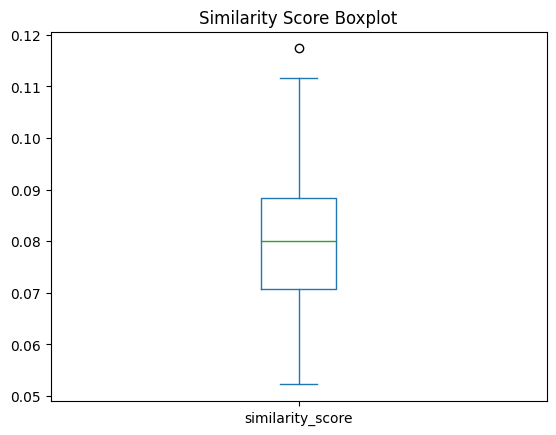

In [93]:
# make boxplot for objective 1 variable from the similarity score
similarity_score1 = result1['similarity_score'].explode().reset_index(drop=True)
similarity_score1.plot(kind='box')
plt.title('Similarity Score Boxplot')
plt.show()

In [94]:
similarity_score1.describe()

count     300.000000
unique    294.000000
top         0.064504
freq        2.000000
Name: similarity_score, dtype: float64

# 6. Single Objective 2: Minimize the Similarity Error

## 6.1. Set the Objective Model

$$
E_{totalsimilarity}=\sum _{k\in K}\sum _{i\in I_k}\sum _{j\in J}e_{ij}\cdot x_{ijk}\:\:\:
$$

In [95]:
E_total_similarity_score = 0

for k, tasks in company_tasks.items():
  E_total_similarity_score += sum(euclidean_similarity_score[i, j] * x[i, j, k] for i in tasks for j in employees)

model.Minimize(E_total_similarity_score)

In [96]:
# # option 2
# E = []
# for k, tasks in company_tasks.items():
#   obj2 = sum(cosine_similarity_score[i, j] * x[i, j, k] for i in tasks for j in employees)
#   E.append(obj2)

# E_total_similarity_score = sum(E)
# model.Maximize(E_total_similarity_score)

## 6.2. Solve the Model

In [97]:
solver = cp_model.CpSolver()
status = solver.Solve(model)

In [98]:
if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
  print('Solution Found!')
  print(f'Objective Value: {solver.ObjectiveValue()}\n')

  print(f'Total Similarity Score: {solver.Value(E_total_similarity_score)}\n')

  x_hat = {}

  for j in employees:
    task = []
    sim = []
    sp = 0
    wasted_sp = 0
    comp = []

    for k, tasks in company_tasks.items():
      for i in tasks:
        if solver.Value(x[i, j, k]) == 1:
          print(f'Task {i} assigned to Employee {j}')
          print(f'Company\t\t\t: {k}')
          print(f'Story Points\t\t: {story_points[i]}')
          print(f"Similarity score\t: {euclidean_similarity_score[i, j]:.10f}\n")

          task.append(i)
          sim.append(euclidean_similarity_score[i, j])
          comp.append(k)
          sp += story_points[i]

    if sp > 0:
      wasted_sp = max_employee_workload - sp
      x_hat[j] = comp, task, sp, wasted_sp, sim

else:
  print('No Solution Found!')
  x_hat = {}

Solution Found!
Objective Value: 19.261108625510825

Total Similarity Score: 19.261108625510825

Task T121 assigned to Employee Talent 1
Company			: P1
Story Points		: 3
Similarity score	: 0.0644087574

Task T129 assigned to Employee Talent 1
Company			: P1
Story Points		: 2
Similarity score	: 0.0583958127

Task T189 assigned to Employee Talent 1
Company			: P1
Story Points		: 3
Similarity score	: 0.0622841347

Task T248 assigned to Employee Talent 1
Company			: P1
Story Points		: 3
Similarity score	: 0.0614018309

Task T257 assigned to Employee Talent 1
Company			: P1
Story Points		: 5
Similarity score	: 0.0614842135

Task T275 assigned to Employee Talent 1
Company			: P1
Story Points		: 3
Similarity score	: 0.0632065063

Task T103 assigned to Employee Talent 2
Company			: P3
Story Points		: 2
Similarity score	: 0.0668686609

Task T116 assigned to Employee Talent 2
Company			: P3
Story Points		: 8
Similarity score	: 0.0661542597

Task T154 assigned to Employee Talent 2
Company			: P3


## 6.3. Print the Result

In [99]:
# Convert dictionary to DataFrame
result2 = pd.DataFrame([(key, value[0], value[1], value[2], value[3], value[4]) for key, value in x_hat.items()],
                      columns=['employee', 'company', 'assigned_task', 'sum_sp', 'wasted_sp', 'similarity_score'])

# Set 'company' as index
result2.set_index('employee', inplace=True)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

result2

company  \
employee                                                        
Talent 1                             [P1, P1, P1, P1, P1, P1]   
Talent 2                                         [P3, P3, P3]   
Talent 4                                         [P2, P2, P2]   
Talent 5             [P3, P3, P3, P3, P3, P3, P3, P3, P3, P3]   
Talent 9                                         [P3, P3, P3]   
Talent 11                                            [P1, P1]   
Talent 12                                            [P1, P1]   
Talent 13                                            [P5, P5]   
Talent 15                                    [P2, P2, P2, P2]   
Talent 16                                        [P2, P2, P2]   
Talent 17   [P4, P4, P4, P4, P4, P4, P4, P4, P4, P4, P4, P...   
Talent 18                            [P5, P5, P5, P5, P5, P5]   
Talent 20                                    [P4, P4, P4, P4]   
Talent 21                                                [P5]   
Talent 22                                    [P3, P3, P3, P3]   
Talent 25                    [P3, P3, P3, P3, P3, P3, P3, P3]   
Talent 26                                    [P2, P2, P2, P2]   
Talent 27                            [P4, P4, P4, P4, P4, P4]   
Talent 29   [P2, P2, P2, P2, P2, P2, P2, P2, P2, P2, P2, P...   
Talent 30                                                [P5]   
Talent 34                    [P4, P4, P4, P4, P4, P4, P4, P4]   
Talent 35                            [P5, P5, P5, P5, P5, P5]   
Talent 36                                            [P5, P5]   
Talent 38                                [P2, P2, P2, P2, P2]   
Talent 40                                            [P1, P1]   
Talent 41                                            [P2, P2]   
Talent 44                            [P5, P5, P5, P5, P5, P5]   
Talent 46                                                [P5]   
Talent 49                            [P1, P1, P1, P1, P1, P1]   
Talent 51                                [P4, P4, P4, P4, P4]   
Talent 53                    [P1, P1, P1, P1, P1, P1, P1, P1]   
Talent 54                                                [P4]   
Talent 55                                        [P4, P4, P4]   
Talent 56                        [P2, P2, P2, P2, P2, P2, P2]   
Talent 57                                                [P2]   
Talent 59                                        [P5, P5, P5]   
Talent 63                                    [P1, P1, P1, P1]   
Talent 64                                        [P3, P3, P3]   
Talent 65                                            [P4, P4]   
Talent 66                                    [P4, P4, P4, P4]   
Talent 67                                            [P5, P5]   
Talent 68                                [P2, P2, P2, P2, P2]   
Talent 72                                        [P2, P2, P2]   
Talent 74   [P5, P5, P5, P5, P5, P5, P5, P5, P5, P5, P5, P...   
Talent 75                                            [P1, P1]   
Talent 76                    [P5, P5, P5, P5, P5, P5, P5, P5]   
Talent 78                                        [P3, P3, P3]   
Talent 79                                        [P2, P2, P2]   
Talent 80                                            [P4, P4]   
Talent 81                                            [P3, P3]   
Talent 82            [P3, P3, P3, P3, P3, P3, P3, P3, P3, P3]   
Talent 84                                [P3, P3, P3, P3, P3]   
Talent 85                        [P3, P3, P3, P3, P3, P3, P3]   
Talent 86                                        [P5, P5, P5]   
Talent 87                                        [P4, P4, P4]   
Talent 89                                    [P5, P5, P5, P5]   
Talent 90                                        [P3, P3, P3]   
Talent 95                                                [P1]   
Talent 96                                            [P2, P2]   
Talent 97                                [P2, P2, P2, P2, P2]   
Talent 99               

In [100]:
total_employee = len(employees)
total_sp = sum(story_points.values())
total_active_employee_obj2 = len(set(employee for employee in x_hat.keys()))
total_active_sp_obj2 = sum(value[2] for value in x_hat.values())
total_idle_employee_obj2 = total_employee - total_active_employee_obj2
total_wasted_sp_obj2 = total_sp - total_active_sp_obj2

print(f'Total Employee\t\t\t: {total_employee}')
print(f'Total Active Employee\t\t: {total_active_employee_obj2}\t{(total_active_employee_obj2/total_employee)*100:.2f}%')
print(f'Total Idle Employee\t\t: {total_idle_employee_obj2}\t{(total_idle_employee_obj2/total_employee)*100:.2f}%\n')
print(f'Total Story Points\t\t: {total_sp}')
print(f'Total Active Story Points\t: {total_active_sp_obj2}\t{(total_active_sp_obj2/total_sp)*100:.2f}%')
print(f'Total Wasted Story Points\t: {total_wasted_sp_obj2}\t{(total_wasted_sp_obj2/total_sp)*100:.2f}%\n')

Total Employee			: 109
Total Active Employee		: 68	62.39%
Total Idle Employee		: 41	37.61%

Total Story Points		: 1139
Total Active Story Points	: 1139	100.00%
Total Wasted Story Points	: 0	0.00%



In [101]:
# sum all the similarity score of task from P5
result2_p5 = result2[result2['company'].apply(lambda x: 'P5' in x)]
total_similarity_score_p5 = result2_p5['similarity_score'].explode().sum()

print(f'Total Similarity Score of Task from P5: {total_similarity_score_p5}')

Total Similarity Score of Task from P5: 4.146226731511491


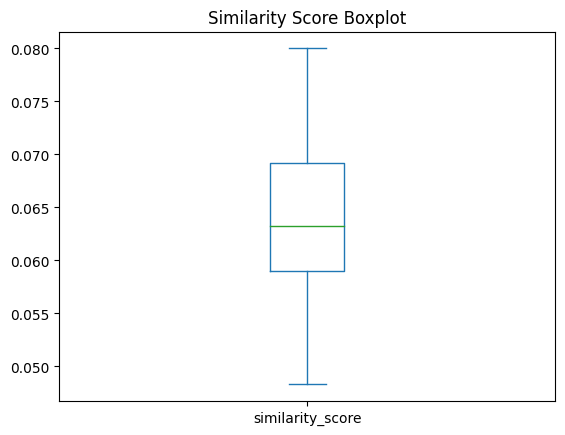

In [102]:
# make boxplot for objective 2 variable from the similarity score
similarity_score2 = result2['similarity_score'].explode().reset_index(drop=True)
similarity_score2.plot(kind='box')
plt.title('Similarity Score Boxplot')
plt.show()

# 7. Single Objective 3: Balancing the Workload

## 7.1. Set the Objective Model

$$
E_{totalsimilarity}=\sum _{k\in K}\sum _{i\in I_k}\sum _{j\in J}e_{ij}\cdot x_{ijk}\:\:\:
$$

In [104]:
model.Minimize(max_workload)

## 7.2. Solve the Model

In [105]:
solver = cp_model.CpSolver()
status = solver.Solve(model)

In [ ]:
if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
  print('Solution Found!')
  print(f'Objective Value: {solver.ObjectiveValue()}\n')

  print(f'Total Similarity Score: {solver.Value(E_total_similarity_score)}\n')

  x_hat = {}

  for j in employees:
    task = []
    sim = []
    sp = 0
    wasted_sp = 0
    comp = []

    for k, tasks in company_tasks.items():
      for i in tasks:
        if solver.Value(x[i, j, k]) == 1:
          print(f'Task {i} assigned to Employee {j}')
          print(f'Company\t\t\t: {k}')
          print(f'Story Points\t\t: {story_points[i]}')
          print(f"Similarity score\t: {euclidean_similarity_score[i, j]:.10f}\n")

          task.append(i)
          sim.append(euclidean_similarity_score[i, j])
          comp.append(k)
          sp += story_points[i]

    if sp > 0:
      wasted_sp = max_employee_workload - sp
      x_hat[j] = comp, task, sp, wasted_sp, sim

else:
  print('No Solution Found!')
  x_hat = {}

## 7.3. Print the Result

In [ ]:
# Convert dictionary to DataFrame
result3 = pd.DataFrame([(key, value[0], value[1], value[2], value[3], value[4]) for key, value in x_hat.items()],
                      columns=['employee', 'company', 'assigned_task', 'sum_sp', 'wasted_sp', 'similarity_score'])

# Set 'company' as index
result3.set_index('employee', inplace=True)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

result3

In [ ]:
total_employee = len(employees)
total_sp = sum(story_points.values())
total_active_employee_obj3 = len(set(employee for employee in x_hat.keys()))
total_active_sp_obj3 = sum(value[2] for value in x_hat.values())
total_idle_employee_obj3 = total_employee - total_active_employee_obj3
total_wasted_sp_obj3 = total_sp - total_active_sp_obj3

print(f'Total Employee\t\t\t: {total_employee}')
print(f'Total Active Employee\t\t: {total_active_employee_obj3}\t{(total_active_employee_obj3/total_employee)*100:.2f}%')
print(f'Total Idle Employee\t\t: {total_idle_employee_obj3}\t{(total_idle_employee_obj3/total_employee)*100:.2f}%\n')
print(f'Total Story Points\t\t: {total_sp}')
print(f'Total Active Story Points\t: {total_active_sp_obj3}\t{(total_active_sp_obj3/total_sp)*100:.2f}%')
print(f'Total Wasted Story Points\t: {total_wasted_sp_obj3}\t{(total_wasted_sp_obj3/total_sp)*100:.2f}%\n')

In [ ]:
# make boxplot for objective 3 variable from the similarity score
similarity_score3 = result3['similarity_score'].explode().reset_index(drop=True)
similarity_score3.plot(kind='box')
plt.title('Similarity Score Boxplot')
plt.show()

In [ ]:
# merge all boxplot in one graph
plt.figure(figsize=(10, 5))
plt.boxplot([similarity_score1, similarity_score2, similarity_score3], labels=['Objective 1', 'Objective 2' ,'Objective 3'])
plt.title('Similarity Score Boxplot')
plt.show()

In [ ]:
# make boxplot for objective 1 variable from the similarity score
workload_1 = result1['sum_sp'].explode().reset_index(drop=True)
workload_2 = result2['sum_sp'].explode().reset_index(drop=True)
workload_3 = result3['sum_sp'].explode().reset_index(drop=True)

# merge all boxplot in one graph
plt.figure(figsize=(10, 5))
plt.boxplot([workload_1, workload_2, workload_3], labels=['Objective 1', 'Objective 2', 'Objective 3'])
plt.title('Workload Balancing Boxplot')
plt.show()

# Multi Objective Approach

## Objective 1 removed

In [ ]:
beta = 0.2
theta = 0.8

model.Minimize((beta * E_total_similarity_score) + (theta * max_workload))

In [ ]:
solver = cp_model.CpSolver()
status = solver.Solve(model)

In [ ]:
if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
  print('Solution Found!')
  print(f'Objective Value: {solver.ObjectiveValue()}\n')

  print(f'Total Idle Employees: {solver.Value(I_total_idle_employee)}')
  print(f'Total Similarity Score: {solver.Value(E_total_similarity_score)}\n')

  x_hat = {}

  for j in employees:
    task = []
    sim = []
    sp = 0
    wasted_sp = 0
    comp = []

    for k, tasks in company_tasks.items():
      for i in tasks:
        if solver.Value(x[i, j, k]) == 1:
          print(f'Task {i} assigned to Employee {j}')
          print(f'Company\t\t\t: {k}')
          print(f'Story Points\t\t: {story_points[i]}')
          print(f"Similarity score\t: {euclidean_similarity_score[i, j]:.10f}\n")

          task.append(i)
          sim.append(euclidean_similarity_score[i, j])
          comp.append(k)
          sp += story_points[i]

    if sp > 0:
      wasted_sp = max_employee_workload - sp
      x_hat[j] = comp, task, sp, wasted_sp, sim

else:
  print('No Solution Found!')
  x_hat = {}

In [ ]:
# Convert dictionary to DataFrame
result_rm_obj1 = pd.DataFrame([(key, value[0], value[1], value[2], value[3], value[4]) for key, value in x_hat.items()],
                      columns=['employee', 'company', 'assigned_task', 'sum_sp', 'wasted_sp', 'similarity_score'])

# Set 'company' as index
result_rm_obj1.set_index('employee', inplace=True)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

result_rm_obj1

In [ ]:
total_active_employee_rm_obj1 = len(set(employee for employee in x_hat.keys()))
total_active_sp_rm_obj1 = sum(value[2] for value in x_hat.values())
total_idle_employee_rm_obj1 = total_employee - total_active_employee_rm_obj1
total_wasted_sp_rm_obj1 = total_sp - total_active_sp_rm_obj1

In [ ]:
similarity_score_rm_obj1 = result_rm_obj1['similarity_score'].explode().reset_index(drop=True)

In [ ]:
workload_rm_obj1 = result_rm_obj1['sum_sp'].explode().reset_index(drop=True)

## Objective 2 removed

In [ ]:
alpha = 0.2
theta = 0.8

model.Minimize((alpha * I_total_idle_employee) + (theta * max_workload))

In [ ]:
solver = cp_model.CpSolver()
status = solver.Solve(model)

In [ ]:
if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
  print('Solution Found!')
  print(f'Objective Value: {solver.ObjectiveValue()}\n')

  print(f'Total Idle Employees: {solver.Value(I_total_idle_employee)}')
  print(f'Total Similarity Score: {solver.Value(E_total_similarity_score)}\n')

  x_hat = {}

  for j in employees:
    task = []
    sim = []
    sp = 0
    wasted_sp = 0
    comp = []

    for k, tasks in company_tasks.items():
      for i in tasks:
        if solver.Value(x[i, j, k]) == 1:
          print(f'Task {i} assigned to Employee {j}')
          print(f'Company\t\t\t: {k}')
          print(f'Story Points\t\t: {story_points[i]}')
          print(f"Similarity score\t: {euclidean_similarity_score[i, j]:.10f}\n")

          task.append(i)
          sim.append(euclidean_similarity_score[i, j])
          comp.append(k)
          sp += story_points[i]

    if sp > 0:
      wasted_sp = max_employee_workload - sp
      x_hat[j] = comp, task, sp, wasted_sp, sim

else:
  print('No Solution Found!')
  x_hat = {}

In [ ]:
# Convert dictionary to DataFrame
result_rm_obj2 = pd.DataFrame([(key, value[0], value[1], value[2], value[3], value[4]) for key, value in x_hat.items()],
                      columns=['employee', 'company', 'assigned_task', 'sum_sp', 'wasted_sp', 'similarity_score'])

# Set 'company' as index
result_rm_obj2.set_index('employee', inplace=True)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

result_rm_obj2

In [ ]:
total_active_employee_rm_obj2 = len(set(employee for employee in x_hat.keys()))
total_active_sp_rm_obj2 = sum(value[2] for value in x_hat.values())
total_idle_employee_rm_obj2 = total_employee - total_active_employee_rm_obj2
total_wasted_sp_rm_obj2 = total_sp - total_active_sp_rm_obj2

In [ ]:
similarity_score_rm_obj2 = result_rm_obj2['similarity_score'].explode().reset_index(drop=True)

In [ ]:
workload_rm_obj2 = result_rm_obj2['sum_sp'].explode().reset_index(drop=True)

## Objective 3 Removed

In [ ]:
alpha = 0.1
beta = 0.9

# model.Minimize((alpha * I_total_idle_employee) + (beta * E_total_similarity_score) + (theta * max_workload))
model.Minimize((alpha * I_total_idle_employee) + (beta * E_total_similarity_score))

In [ ]:
solver = cp_model.CpSolver()
status = solver.Solve(model)

In [ ]:
if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
  print('Solution Found!')
  print(f'Objective Value: {solver.ObjectiveValue()}\n')

  print(f'Total Idle Employees: {solver.Value(I_total_idle_employee)}')
  print(f'Total Similarity Score: {solver.Value(E_total_similarity_score)}\n')

  x_hat = {}

  for j in employees:
    task = []
    sim = []
    sp = 0
    wasted_sp = 0
    comp = []

    for k, tasks in company_tasks.items():
      for i in tasks:
        if solver.Value(x[i, j, k]) == 1:
          print(f'Task {i} assigned to Employee {j}')
          print(f'Company\t\t\t: {k}')
          print(f'Story Points\t\t: {story_points[i]}')
          print(f"Similarity score\t: {euclidean_similarity_score[i, j]:.10f}\n")

          task.append(i)
          sim.append(euclidean_similarity_score[i, j])
          comp.append(k)
          sp += story_points[i]

    if sp > 0:
      wasted_sp = max_employee_workload - sp
      x_hat[j] = comp, task, sp, wasted_sp, sim

else:
  print('No Solution Found!')
  x_hat = {}

In [ ]:
# Convert dictionary to DataFrame
result_rm_obj3 = pd.DataFrame([(key, value[0], value[1], value[2], value[3], value[4]) for key, value in x_hat.items()],
                      columns=['employee', 'company', 'assigned_task', 'sum_sp', 'wasted_sp', 'similarity_score'])

# Set 'company' as index
result_rm_obj3.set_index('employee', inplace=True)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

result_rm_obj3

In [ ]:
total_active_employee_rm_obj3 = len(set(employee for employee in x_hat.keys()))
total_active_sp_rm_obj3 = sum(value[2] for value in x_hat.values())
total_idle_employee_rm_obj3 = total_employee - total_active_employee
total_wasted_sp_rm_obj3 = total_sp - total_active_sp

In [ ]:
similarity_score_rm_obj3 = result_rm_obj3['similarity_score'].explode().reset_index(drop=True)

In [ ]:
workload_rm_obj3 = result_rm_obj2['sum_sp'].explode().reset_index(drop=True)

# Visualization

In [ ]:
# Create bar chart of idle employees
plt.figure(figsize=(10,5))
plt.bar(labels=['Objective 1', 'Objective 2' ,'Objective 3', 'Remove Obj 1', 'Remove Obj 2', 'Remove Obj 3'],
        [total_idle_employee_obj1, total_idle_employee_obj2, total_idle_employee_obj3, total_idle_employee_rm_obj1, total_idle_employee_rm_obj2, total_idle_employee_rm_obj3])
plt.title('Idle Employees Bar Chart')
plt.xticks(rotation=15)
plt.show()

In [ ]:
print(f'Number of Idle Employees')
print(f'Single Objective 1: {total_idle_employee_obj1}')
print(f'Single Objective 2: {total_idle_employee_obj2}')
print(f'Single Objective 3: {total_idle_employee_obj3}')
print(f'Multi Objective - Remove objective 1: {total_idle_employee_rm_obj1}')
print(f'Multi Objective - Remove objective 2: {total_idle_employee_rm_obj2}')
print(f'Multi Objective - Remove objective 3: {total_idle_employee_rm_obj3}')

In [ ]:
# Create box plot of
plt.figure(figsize=(10, 5))
plt.boxplot([similarity_score1, similarity_score2, similarity_score3, similarity_score_rm_obj1, similarity_score_rm_obj2, similarity_score_rm_obj3],
            labels=['Objective 1', 'Objective 2' ,'Objective 3', 'Remove Obj 1', 'Remove Obj 2', 'Remove Obj 3'])
plt.title('Similarity Score Boxplot')
plt.xticks(rotation=15)
plt.show()


# merge all boxplot in one graph
plt.figure(figsize=(10, 5))
plt.boxplot([similarity_score1, similarity_score2, similarity_score3], labels=['Objective 1', 'Objective 2' ,'Objective 3'])
plt.title('Similarity Score Boxplot')
plt.show()

In [ ]:
# make boxplot for objective 1 variable from the similarity score
workload_1 = result1['sum_sp'].explode().reset_index(drop=True)
workload_2 = result2['sum_sp'].explode().reset_index(drop=True)
workload_3 = result3['sum_sp'].explode().reset_index(drop=True)
workload_rm_obj1 = result_rm_obj1['sum_sp'].explode().reset_index(drop=True)
workload_rm_obj2 = result_rm_obj2['sum_sp'].explode().reset_index(drop=True)
workload_rm_obj3 = result_rm_obj3['sum_sp'].explode().reset_index(drop=True)


# merge all boxplot in one graph
plt.figure(figsize=(10, 5))
plt.boxplot([workload_1, workload_2, workload_3, workload_rm_obj1, workload_rm_obj2, workload_rm_obj3],
            labels=['Objective 1', 'Objective 2', 'Objective 3', 'Single Objective', 'Remove Obj 1', 'Remove Obj 2', 'Remove Obj 3'])
plt.title('Workload Balancing Boxplot')
plt.xticks(rotation=15)
plt.show()